In [ ]:
#double check - especially with the second class EC-number

In [13]:
import pandas as pd
from argparse import ArgumentParser
from tqdm import tqdm
import pickle
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AutoTokenizer
import random
from selenium import webdriver
from selenium.webdriver.common.by import By
import os
import time
from tqdm import tqdm
from selenium.webdriver.firefox.options import Options
from Bio import SeqIO
import proteinfer
import multiprocessing
import glob, os

In [2]:
with open("joined_generated_2_short.fasta",'r') as fn:
    data = fn.readlines()

In [3]:
fasta = [i.replace('\n','').split() for i in data]

In [4]:
new_fasta ={}
for idx in range(0,len(fasta),2):
    new_fasta[fasta[idx][0]+', '+fasta[idx+1][0]]=fasta[idx+1][1]

In [5]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [6]:
splitted_ls = [i for i in split(list(new_fasta.items()),multiprocessing.cpu_count())]

In [ ]:
#use if fasta already exist and you want to proceed the process
for idx,i in enumerate(splitted_ls):
    data = open(f'{idx}_out_natural.fasta','r').readlines()
    EC_ident = [j.split('|')[0][1:] for j in data if j.startswith('>')]
    rest = list(set([j[0] for j in i])-set(EC_ident))
    print(len(rest))
    splitted_ls[idx] = [j for j in i if j[0] in rest]

In [ ]:
outdir = '/Users/sebastianlindner/Desktop'
processes = {}
for i in range(multiprocessing.cpu_count()):
    time.sleep(5)
    processes[f'process{i}'] = multiprocessing.Process(target=proteinfer.run, args=(splitted_ls[i],f'{i}_out_natural.fasta',outdir,))
    processes[f'process{i}'].start()

In [155]:
perc = round((sum([(len(open(f'{i}_out_natural.fasta','r').readlines())/len(splitted_ls[i]))/2 for i in range(multiprocessing.cpu_count()) if len(splitted_ls[i]) != 0])/multiprocessing.cpu_count())*100,2)
while perc < 100.:
    time.sleep(10)
    print(f"Total progress: {round((sum([(len(open(f'{i}_out_natural.fasta','r').readlines())/len(splitted_ls[i]))/2 for i in range(multiprocessing.cpu_count())if len(splitted_ls[i]) != 0 ])/multiprocessing.cpu_count())*100,2)}%")
    time.sleep(60)

 10%|█         | 17/165 [13:03<1:53:39, 46.08s/it]

Total progress: 4.93%


 11%|█         | 18/165 [13:47<1:51:50, 45.65s/it]

Total progress: 5.31%


 12%|█▏        | 20/165 [15:19<1:50:45, 45.83s/it]

Total progress: 5.92%


 13%|█▎        | 21/165 [16:05<1:49:53, 45.79s/it]

Total progress: 6.22%


 14%|█▍        | 23/165 [17:37<1:48:27, 45.83s/it]

Total progress: 6.83%


 15%|█▍        | 24/165 [18:23<1:47:40, 45.82s/it]

Total progress: 7.13%


 16%|█▌        | 26/165 [19:54<1:45:57, 45.74s/it]

Total progress: 7.74%


 16%|█▋        | 27/165 [20:40<1:45:17, 45.78s/it]

Total progress: 8.04%


 18%|█▊        | 29/165 [22:12<1:44:16, 46.00s/it]

Total progress: 8.65%


 18%|█▊        | 29/164 [23:33<1:43:27, 45.98s/it]

Total progress: 9.03%


 19%|█▉        | 32/165 [24:31<1:42:07, 46.07s/it]

Total progress: 9.56%


 20%|█▉        | 32/164 [25:50<1:40:32, 45.70s/it]

Total progress: 9.94%


 21%|██        | 35/165 [26:52<1:41:45, 46.97s/it]

Total progress: 10.47%


 21%|██▏       | 35/164 [28:07<1:38:03, 45.61s/it]

Total progress: 10.85%


 23%|██▎       | 38/165 [29:09<1:37:40, 46.15s/it]

Total progress: 11.38%


 24%|██▍       | 40/165 [30:42<1:35:14, 45.72s/it]

Total progress: 11.84%


 25%|██▍       | 41/165 [31:26<1:34:40, 45.81s/it]

Total progress: 12.29%


 26%|██▌       | 43/165 [32:59<1:32:46, 45.62s/it]

Total progress: 12.75%


 27%|██▋       | 44/165 [33:43<1:32:02, 45.64s/it]

Total progress: 13.2%


 28%|██▊       | 46/165 [35:17<1:30:31, 45.64s/it]

Total progress: 13.73%


 28%|██▊       | 47/165 [36:00<1:29:52, 45.70s/it]

Total progress: 14.11%


 30%|██▉       | 49/165 [37:34<1:28:13, 45.63s/it]

Total progress: 14.64%


 30%|███       | 50/165 [38:17<1:27:22, 45.59s/it]

Total progress: 15.02%


 32%|███▏      | 52/165 [39:55<1:27:54, 46.67s/it]

Total progress: 15.55%


 32%|███▏      | 53/165 [40:39<1:27:07, 46.67s/it]

Total progress: 15.93%


 33%|███▎      | 55/165 [42:13<1:24:40, 46.18s/it]

Total progress: 16.46%


 34%|███▎      | 55/164 [43:25<1:23:43, 46.09s/it]

Total progress: 16.92%


 35%|███▌      | 58/165 [44:27<1:21:42, 45.82s/it]

Total progress: 17.45%


 35%|███▌      | 58/164 [45:42<1:20:55, 45.81s/it]

Total progress: 17.83%


 37%|███▋      | 61/165 [46:45<1:19:32, 45.89s/it]

Total progress: 18.36%


 37%|███▋      | 61/164 [48:00<1:19:00, 46.02s/it]

Total progress: 18.74%


 39%|███▉      | 64/165 [49:02<1:16:54, 45.68s/it]

Total progress: 19.27%


 40%|████      | 66/165 [50:33<1:15:22, 45.68s/it]

Total progress: 19.73%


 41%|████      | 67/165 [51:19<1:14:39, 45.71s/it]

Total progress: 20.18%


 42%|████▏     | 69/165 [52:51<1:13:32, 45.96s/it]

Total progress: 20.64%


 42%|████▏     | 70/165 [53:36<1:12:19, 45.67s/it]

Total progress: 21.09%


 44%|████▎     | 72/165 [55:09<1:10:43, 45.63s/it]

Total progress: 21.62%


 44%|████▍     | 73/165 [55:52<1:09:55, 45.60s/it]

Total progress: 22.0%


 45%|████▌     | 75/165 [57:30<1:10:24, 46.94s/it]

Total progress: 22.46%


 46%|████▌     | 76/165 [58:20<1:11:25, 48.16s/it]

Total progress: 22.91%


 47%|████▋     | 78/165 [59:50<1:07:29, 46.55s/it]

Total progress: 23.37%


 48%|████▊     | 79/165 [1:00:50<1:08:19, 47.67s/it]

Total progress: 23.82%


 49%|████▉     | 81/165 [1:02:07<1:04:20, 45.96s/it]

Total progress: 24.28%


 50%|████▉     | 82/165 [1:03:07<1:04:22, 46.54s/it]

Total progress: 24.73%


 51%|█████     | 84/165 [1:04:24<1:01:41, 45.70s/it]

Total progress: 25.19%


 52%|█████▏    | 85/165 [1:05:26<1:01:41, 46.27s/it]

Total progress: 25.64%


 53%|█████▎    | 87/165 [1:06:40<59:13, 45.56s/it]  

Total progress: 26.1%


 53%|█████▎    | 87/164 [1:07:54<58:48, 45.83s/it]  

Total progress: 26.63%


 55%|█████▍    | 90/165 [1:08:58<57:05, 45.67s/it]

Total progress: 27.01%


 55%|█████▍    | 90/164 [1:10:11<56:27, 45.77s/it]

Total progress: 27.54%


 56%|█████▋    | 93/165 [1:11:14<54:46, 45.65s/it]

Total progress: 27.92%


 57%|█████▋    | 93/164 [1:12:28<54:05, 45.71s/it]

Total progress: 28.45%


 58%|█████▊    | 96/165 [1:13:31<52:29, 45.65s/it]

Total progress: 28.83%


 59%|█████▉    | 98/165 [1:15:05<51:43, 46.32s/it]

Total progress: 29.44%


 60%|██████    | 99/165 [1:15:54<51:47, 47.08s/it]

Total progress: 29.74%


 60%|██████    | 99/164 [1:17:10<51:04, 47.15s/it]]

Total progress: 30.27%


 62%|██████▏   | 102/165 [1:18:13<48:48, 46.48s/it]

Total progress: 30.65%


 63%|██████▎   | 104/165 [1:19:44<46:49, 46.06s/it]

Total progress: 31.26%


 64%|██████▎   | 105/165 [1:20:30<45:57, 45.96s/it]

Total progress: 31.56%


 65%|██████▍   | 107/165 [1:22:02<44:22, 45.90s/it]

Total progress: 32.17%


 65%|██████▌   | 108/165 [1:23:00<43:42, 46.01s/it]

Total progress: 32.55%


 67%|██████▋   | 110/165 [1:24:19<42:00, 45.82s/it]

Total progress: 33.08%


 67%|██████▋   | 111/165 [1:25:17<41:18, 45.90s/it]

Total progress: 33.46%


 68%|██████▊   | 113/165 [1:26:36<39:41, 45.79s/it]

Total progress: 33.99%


 69%|██████▉   | 114/165 [1:27:34<38:51, 45.72s/it]

Total progress: 34.37%


 70%|███████   | 116/165 [1:28:53<37:18, 45.69s/it]

Total progress: 34.9%


 71%|███████   | 117/165 [1:30:08<36:40, 45.84s/it]

Total progress: 35.36%


 72%|███████▏  | 119/165 [1:31:11<35:12, 45.92s/it]

Total progress: 35.81%


 73%|███████▎  | 120/165 [1:32:26<34:21, 45.81s/it]

Total progress: 36.27%


 74%|███████▍  | 122/165 [1:33:33<33:42, 47.03s/it]

Total progress: 36.72%


 75%|███████▍  | 123/165 [1:34:48<32:38, 46.64s/it]

Total progress: 37.18%


 76%|███████▌  | 125/165 [1:35:52<30:57, 46.43s/it]

Total progress: 37.63%


 76%|███████▋  | 126/165 [1:37:05<30:00, 46.16s/it]

Total progress: 38.09%


 78%|███████▊  | 128/165 [1:38:09<28:18, 45.91s/it]

Total progress: 38.54%


 78%|███████▊  | 128/164 [1:39:24<27:28, 45.79s/it]

Total progress: 39.07%


 79%|███████▉  | 131/165 [1:40:26<25:57, 45.80s/it]

Total progress: 39.45%


 80%|███████▉  | 131/164 [1:41:41<25:07, 45.68s/it]

Total progress: 39.98%


 81%|████████  | 134/165 [1:42:43<23:36, 45.70s/it]

Total progress: 40.36%


 82%|████████▏ | 136/165 [1:44:14<22:03, 45.64s/it]

Total progress: 40.97%


 83%|████████▎ | 137/165 [1:45:10<21:19, 45.69s/it]

Total progress: 41.35%


 84%|████████▍ | 139/165 [1:46:32<19:51, 45.81s/it]

Total progress: 41.88%


 85%|████████▍ | 140/165 [1:47:27<19:00, 45.64s/it]

Total progress: 42.26%


 86%|████████▌ | 142/165 [1:48:49<17:33, 45.81s/it]

Total progress: 42.79%


 87%|████████▋ | 143/165 [1:49:44<16:44, 45.66s/it]

Total progress: 43.17%


 88%|████████▊ | 145/165 [1:51:10<15:34, 46.73s/it]

Total progress: 43.7%


 88%|████████▊ | 146/165 [1:52:04<14:41, 46.42s/it]

Total progress: 44.08%


 90%|████████▉ | 148/165 [1:53:30<13:13, 46.69s/it]

Total progress: 44.61%


 90%|█████████ | 149/165 [1:54:39<12:15, 45.95s/it]

Total progress: 45.07%


 92%|█████████▏| 151/165 [1:55:47<10:43, 45.99s/it]

Total progress: 45.52%


 92%|█████████▏| 152/165 [1:56:55<09:54, 45.70s/it]

Total progress: 45.98%


 93%|█████████▎| 154/165 [1:58:04<08:24, 45.83s/it]

Total progress: 46.43%


 94%|█████████▍| 155/165 [1:59:12<07:35, 45.57s/it]

Total progress: 46.89%


 95%|█████████▌| 157/165 [2:00:23<06:10, 46.27s/it]

Total progress: 47.34%


 96%|█████████▌| 158/165 [2:01:33<05:26, 46.58s/it]

Total progress: 47.8%


 97%|█████████▋| 160/165 [2:02:43<03:52, 46.47s/it]

Total progress: 48.25%


 98%|█████████▊| 161/165 [2:03:54<03:07, 46.86s/it]

Total progress: 48.71%


 99%|█████████▉| 163/165 [2:05:03<01:33, 46.52s/it]

Total progress: 49.17%


 99%|█████████▉| 164/165 [2:06:15<00:46, 46.91s/it]

Total progress: 49.62%


100%|██████████| 164/164 [2:07:04<00:00, 46.49s/it]


Total progress: 50.0%
Total progress: 50.0%


KeyboardInterrupt: 

In [29]:
acc = 0
tot = 0
empty = 0
for idx,i in enumerate(splitted_ls):
    data = open(f'{idx}_out_natural.fasta','r').readlines()
    true = [j.split('|')[0].split(',')[2].replace(' ','') for j in data if j.startswith('>')]
    lab = [j.split('|')[1].strip("('',)").replace("'",'').replace(',','') for j in data if j.startswith('>')]
    #acc += sum([lab[ix][3:].rsplit('.', 2)[0] in j for ix,j in enumerate(true) if lab[ix] != ''])
    acc += sum([sum([j.startswith(x.rsplit('.', 0)[0]) for x in lab[ix][3:].split(' ')])/len(lab[ix][3:].split(' ')) for ix,j in enumerate(true) if lab[ix] != ''])
    tot += len([lab[ix] in j for ix,j in enumerate(true) if lab[ix] != ''])
    empty += len([j for j in lab if j == ''])/len([j for j in lab ])
print(f'No label assigned: {empty/len(splitted_ls)}')
print(f'Overall Accuracy for natural sequences with predicted labels: {acc/tot}')

No label assigned: 0.5407028042073261
Overall Accuracy for natural sequences with predicted labels: 0.62006237006237


In [23]:
acc = 0
tot = 0
empty = 0
for idx,i in enumerate(splitted_ls):
    data = open(f'{idx}_out_generated.fasta','r').readlines()
    true = [j.split('|')[0].split(',')[2].replace(' ','') for j in data if j.startswith('>')]
    lab = [j.split('|')[1].strip("('',)").replace("'",'').replace(',','') for j in data if j.startswith('>')]
    #acc += sum([lab[ix][3:].rsplit('.', 2)[0] in j for ix,j in enumerate(true) if lab[ix] != ''])
    acc += sum([sum([j.startswith(x.rsplit('.', 0)[0]) for x in lab[ix][3:].split(' ')])/len(lab[ix][3:].split(' ')) for ix,j in enumerate(true) if lab[ix] != ''])
    tot += len([lab[ix] in j for ix,j in enumerate(true) if lab[ix] != ''])
    empty += len([j for j in lab if j == ''])/len([j for j in lab ])
print(f'No label assigned: {empty/len(splitted_ls)}')
print(f'Overall Accuracy for generated sequences with predicted labels: {acc/tot}')

No label assigned: 0.698
Overall Accuracy for generated sequences with predicted labels: 0.5395051508462104


In [1]:
import pandas as pd
df = pd.DataFrame(columns =['','Percentage', 'Dataset']) 
df.loc[1,:] = ['Missing label', 0.5407028042073261,'natural']
df.loc[2,:] = ['1st Level', 0.8115038115038115,'natural']
df.loc[3,:] = ['2nd Level', 0.7959112959112958,'natural']
df.loc[4,:] = ['3rd Level', 0.760914760914761,'natural']
df.loc[5,:] = ['4th Level', 0.62006237006237,'natural']
df.loc[6,:] = ['Missing label',0.698,'generated']
df.loc[7,:] = ['1st Level',0.8090139808682855,'generated']
df.loc[8,:] = ['2nd Level',0.7646615158204562,'generated']
df.loc[9,:] = ['3rd Level',0.7345842531272995,'generated']
df.loc[10,:] = ['4th Level',0.5395051508462104,'generated']

In [2]:
df

,,Percentage,Dataset
1,Missing label,0.540703,natural
2,1st Level,0.811504,natural
3,2nd Level,0.795911,natural
4,3rd Level,0.760915,natural
5,4th Level,0.620062,natural
6,Missing label,0.698,generated
7,1st Level,0.809014,generated
8,2nd Level,0.764662,generated
9,3rd Level,0.734584,generated
10,4th Level,0.539505,generated


In [7]:
colors = ["#FBC94E", '#634687',"#0B203F","#68320D"] #"#F7FCFF","#F3EBA2"

color_palette = sns.color_palette(colors)

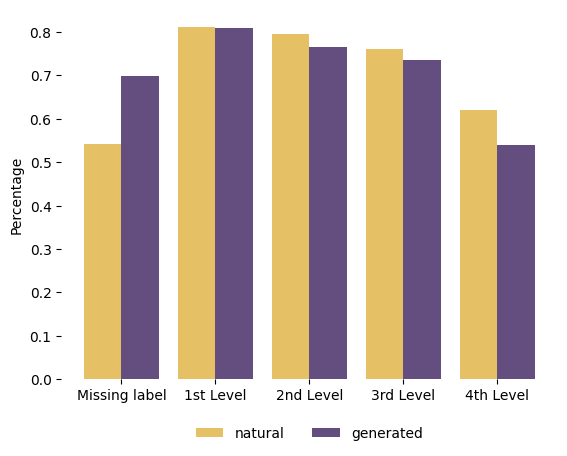

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = sns.barplot(data=df,x='',y='Percentage',hue='Dataset',palette=color_palette)
sns.move_legend(fig, "lower center", bbox_to_anchor=(.5, -.2), ncol=3, title=None, frameon=False)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.spines['left'].set_visible(False)
plt.plot()
plt.savefig('./barplot_proteinfer',dpi=100,bbox_inches='tight')